<h2>Understanding the working of perceptron</h2><br>
<p>
Perceptron is an algorithm for learning a binary classifier: a function that maps its input x (a real-valued vector) to an output value  f(x) (a single binary value):
</p>
<img src="perceptron1.png">
<p>
h(X) represents the hyper plane that would be able to split the data into positives and negatives. Perceptron trains a random h(X) and improves the h(X) so that the misclassification error is minimized.<br>
This is done so using the 2 update equations :
</p>
<img src="perceptron2.png">

<h2>Creating a sample program to understand the working of perceptron</h2>

In [54]:
"""Importing the required modules"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

In [14]:
"""creating a feature X1"""

X1 = np.array([1,4,1,4])
X1

array([1, 4, 1, 4])

In [15]:
"""creating a feature X2"""

X2 = np.array([1,1,3,3])
X2

array([1, 1, 3, 3])

In [16]:
"""combine X1 and X2"""

X = np.vstack((X1,X2))
X

array([[1, 4, 1, 4],
       [1, 1, 3, 3]])

In [17]:
y = np.array([1, -1, 1, -1])
y

array([ 1, -1,  1, -1])

In [20]:
"""a function to create the graph for each iteration """
def show_graph(beta, beta0, X, y, x = None):
    
    """creating sample values for understanding the new hyperplane"""
    
    sampleX2 = np.array([0, 1, 2, 3, 4, 5])
    
    """checking if the denominatoe is 0"""
    if(beta[0] != 0):
        sampleX1 =  -(( beta0) + np.multiply(beta[1] , sampleX2))/ (beta[0])
    else:
        sampleX1 = np.zeros(len(sampleX2))
        
    """plotting the chart"""
    colors=["red", "limegreen"]
    
    cmap = matplotlib.colors.ListedColormap(colors)
    
    plt.scatter(X[0], X[1], c = y, cmap = cmap, marker = 'o', s = 200)

    """checking and marking the misclassified point"""
    if x is not None:
        plt.annotate('wrongly classified', xy = (x[0],x[1]), xytext=(x[0],x[1]))
        
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.plot(sampleX1,sampleX2)
    plt.show()



"""perceptron learning algorithm"""
def learn_perceptron(beta, beta0, X, y, alpha, epoch):
    
    """iterate for a fixed number of epoch"""
    
    for i in range(epoch):
    
        """set initial set of errors as zero"""
        errors = 0
        
        print('########Epoch {}###########'.format(i))
        
        """iterate over the X and y data"""
        
        for x,yi in zip(X.T, y):

            """if the hyper plane wrongly classifies add error and compute new beta values"""
            if(yi * (beta0 + np.dot(beta, x)) <= 0):
                
                errors = errors + 1
                beta = beta + alpha * yi * x
                beta0 = beta0 + alpha * yi
                show_graph(beta, beta0, X, y, x)
                
                """print each iteration values for better understanding"""
                
                print ('x = ',x)
                print ('beta ={} , beta0 = {}\n'.format(beta, beta0))
                print ('error = ', errors)
        
        """if the error is zero for a complete iteration throught the values then converged"""
        if( errors == 0):
            print ('###########\nx',x)
            print ('beta ={} , beta0 = {}\n'.format(beta, beta0))
            print ('error = ', errors)
            print('converged')
            
            """show the learned hyperplane"""
            
            show_graph(beta, beta0, X, y)
            break
    

    
        

<h2>Perceptron learning on linearly seperable data</h2>

########Epoch 0###########


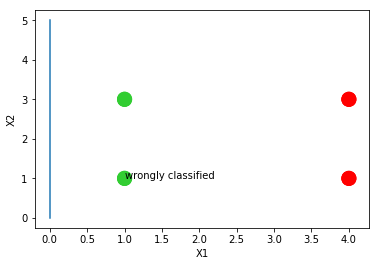

x =  [1 1]
beta =[2 0] , beta0 = 0

error =  1


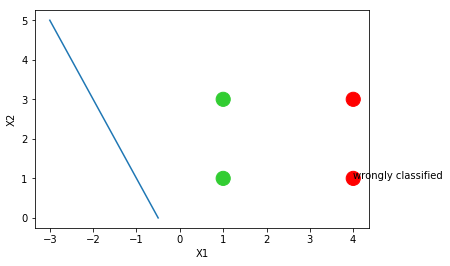

x =  [4 1]
beta =[-2 -1] , beta0 = -1

error =  2


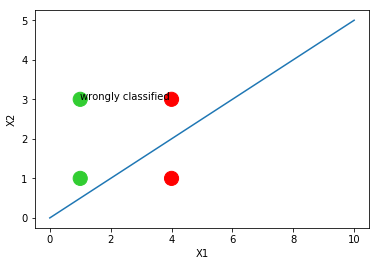

x =  [1 3]
beta =[-1  2] , beta0 = 0

error =  3


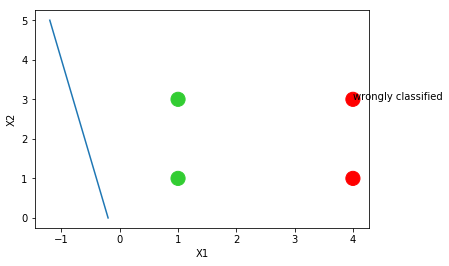

x =  [4 3]
beta =[-5 -1] , beta0 = -1

error =  4
########Epoch 1###########


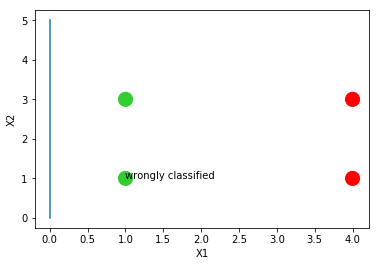

x =  [1 1]
beta =[-4  0] , beta0 = 0

error =  1


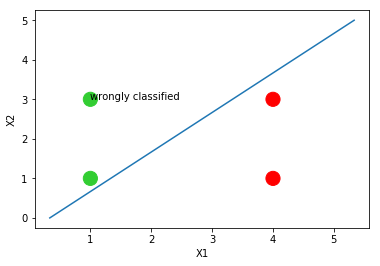

x =  [1 3]
beta =[-3  3] , beta0 = 1

error =  2
########Epoch 2###########
###########
x [4 3]
beta =[-3  3] , beta0 = 1

error =  0
converged


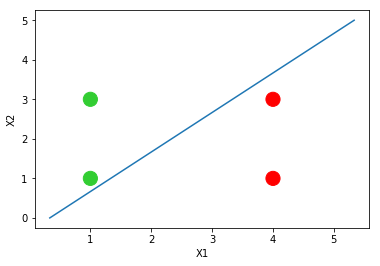

In [21]:
"""calling the function with the values for X and y"""

learn_perceptron(np.array([1, -1]), -1, X, y, 1, 20)

<h2>Perceptron learning on linearly unseperable data</h2>

In [50]:
X_new = np.array([[2, 2, -1, -1],[2, -1, -1, 2]], np.int32)
X_new

array([[ 2,  2, -1, -1],
       [ 2, -1, -1,  2]])

In [51]:
y_new = np.array([1, -1, 1, -1])
y_new

array([ 1, -1,  1, -1])

########Epoch 0###########


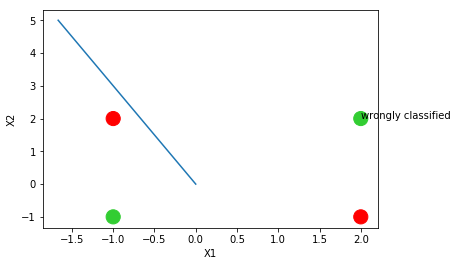

x =  [2 2]
beta =[3 1] , beta0 = 0

error =  1


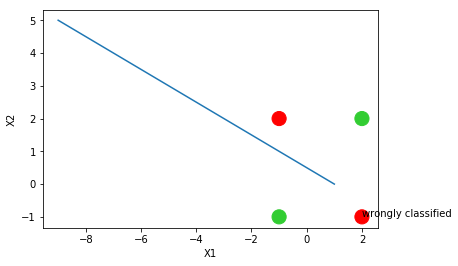

x =  [ 2 -1]
beta =[1 2] , beta0 = -1

error =  2


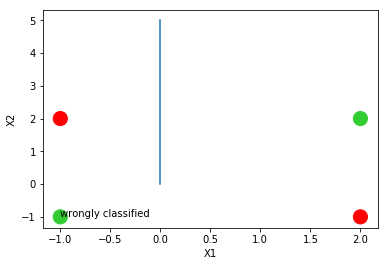

x =  [-1 -1]
beta =[0 1] , beta0 = 0

error =  3


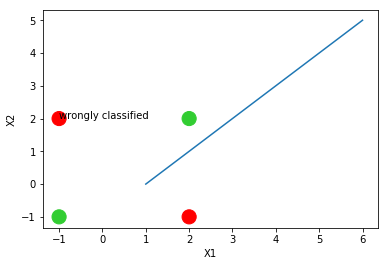

x =  [-1  2]
beta =[ 1 -1] , beta0 = -1

error =  4
########Epoch 1###########


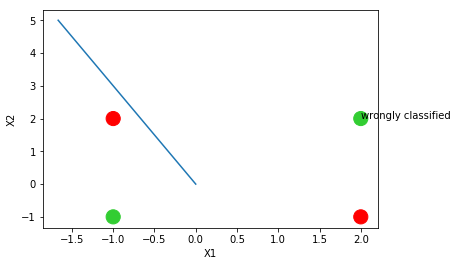

x =  [2 2]
beta =[3 1] , beta0 = 0

error =  1


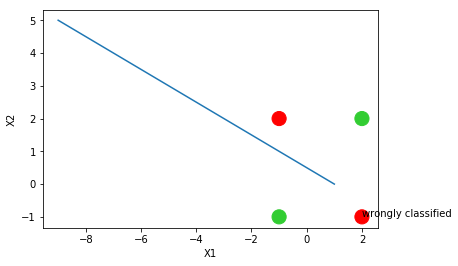

x =  [ 2 -1]
beta =[1 2] , beta0 = -1

error =  2


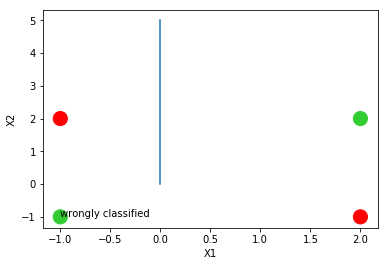

x =  [-1 -1]
beta =[0 1] , beta0 = 0

error =  3


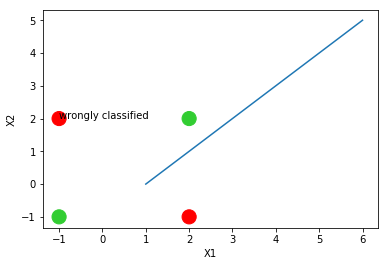

x =  [-1  2]
beta =[ 1 -1] , beta0 = -1

error =  4


In [26]:
learn_perceptron(np.array([1, -1]), -1, X_new, y_new, 1, 2)

<h4>No matter how many iteration the perceptron tries to learn the data is not linearly seperable in 2 Dimension<h4>

<h2> The Kernal Trick to seperate linearly inseperable data</h2>
<p> It's better not to explain about the kernel trick and let the image explain it for you</p>
<p> image url :http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html</p>
<img src="perceptron3.png" >
<p> we use a trick and convert the data into a larger dimension and now try to split it using a hyperplane as can be seen from the image. The circle points were not linearly seperable so we converted the data into 3D and here the points are linearly seperable.</p>

In [52]:
y_new = np.array([1, -1, 1, -1])
y_new

array([ 1, -1,  1, -1])

In [53]:
X_new1 = np.array([[2, 2, -1, -1],[2, -1, -1, 2],[1, 4, 2, 6]], np.int32)
X_new1

array([[ 2,  2, -1, -1],
       [ 2, -1, -1,  2],
       [ 1,  4,  2,  6]])

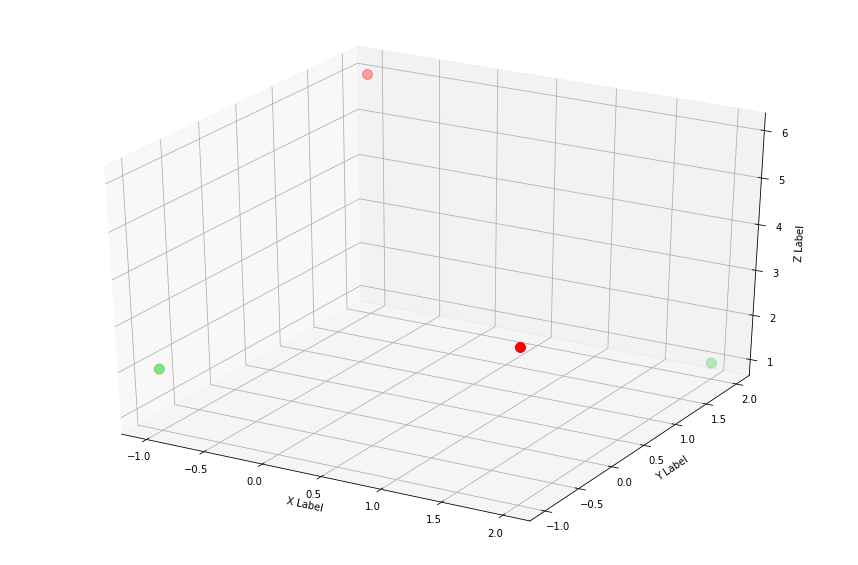

In [67]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
colors=["red", "limegreen"]
cmap = matplotlib.colors.ListedColormap(colors)
ax.scatter(X_new1[0], X_new1[1], X_new1[2], c=y_new, cmap =cmap, s=100)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

<h4>Now the same 4 points from the previous unseperable data can be seperated using a plane in 3D if a suitable kernal is used. In machine learning, the (Gaussian) radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms. In particular, it is commonly used in support vector machine classification.</h4>